In [1]:
import pandas as pd

# Define the file path
file_path = 'D:\superstore_dataset.csv\superstore_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,order_id,order_date,ship_date,customer,product_name,category,city,country,discount,profit,quantity,sales
0,US-2020-103800,01/03/2019,01/07/2019,Darren Powers,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Office Supplies,Houston,United States,0.2,5.5512,2,16.448
1,US-2020-112326,01/04/2019,01/08/2019,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Naperville,United States,0.8,-5.4870,2,3.540
2,US-2020-112326,01/04/2019,01/08/2019,Phillina Ober,Avery 508,Office Supplies,Naperville,United States,0.2,4.2717,3,11.784
3,US-2020-112326,01/04/2019,01/08/2019,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Naperville,United States,0.2,-64.7748,3,272.736
4,US-2020-141817,01/05/2019,01/12/2019,Mick Brown,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Office Supplies,Philadelphia,United States,0.2,4.8840,3,19.536


In [2]:
# Fill missing values
df['sales'] = df['sales'].fillna(df['sales'].mean())
df['profit'] = df['profit'].fillna(df['profit'].mode()[0])
df['quantity'] = df['quantity'].fillna(df['quantity'].mode()[0])
df['discount'] = df['discount'].fillna(df['discount'].mode()[0])

# Verify that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      49 non-null     object 
 1   order_date    49 non-null     object 
 2   ship_date     49 non-null     object 
 3   customer      49 non-null     object 
 4   product_name  49 non-null     object 
 5   category      49 non-null     object 
 6   city          49 non-null     object 
 7   country       49 non-null     object 
 8   discount      49 non-null     float64
 9   profit        49 non-null     float64
 10  quantity      49 non-null     int64  
 11  sales         49 non-null     float64
dtypes: float64(3), int64(1), object(8)
memory usage: 4.7+ KB


In [3]:
# Descriptive statistics
df.describe()

,discount,profit,quantity,sales
count,49.000000,49.000000,49.000000,49.000000
mean,0.172449,42.924945,3.836735,230.451898
std,0.252294,139.692971,2.034565,453.448811
min,0.000000,-320.597000,1.000000,2.890000
25%,0.000000,1.358300,2.000000,12.780000
50%,0.000000,6.486400,3.000000,37.408000
75%,0.200000,28.598400,5.000000,181.470000
max,0.800000,746.407800,10.000000,2573.820000


D:\DataSet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


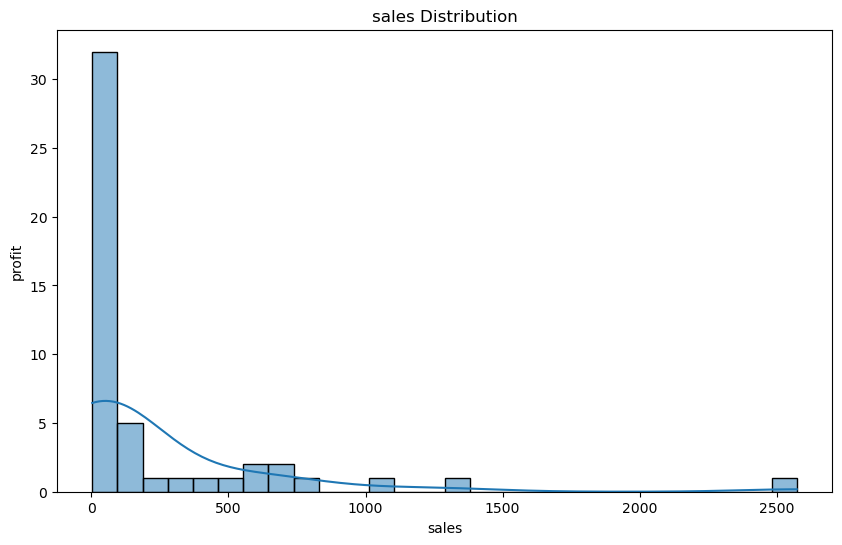

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], kde=True)
plt.title('sales Distribution')
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

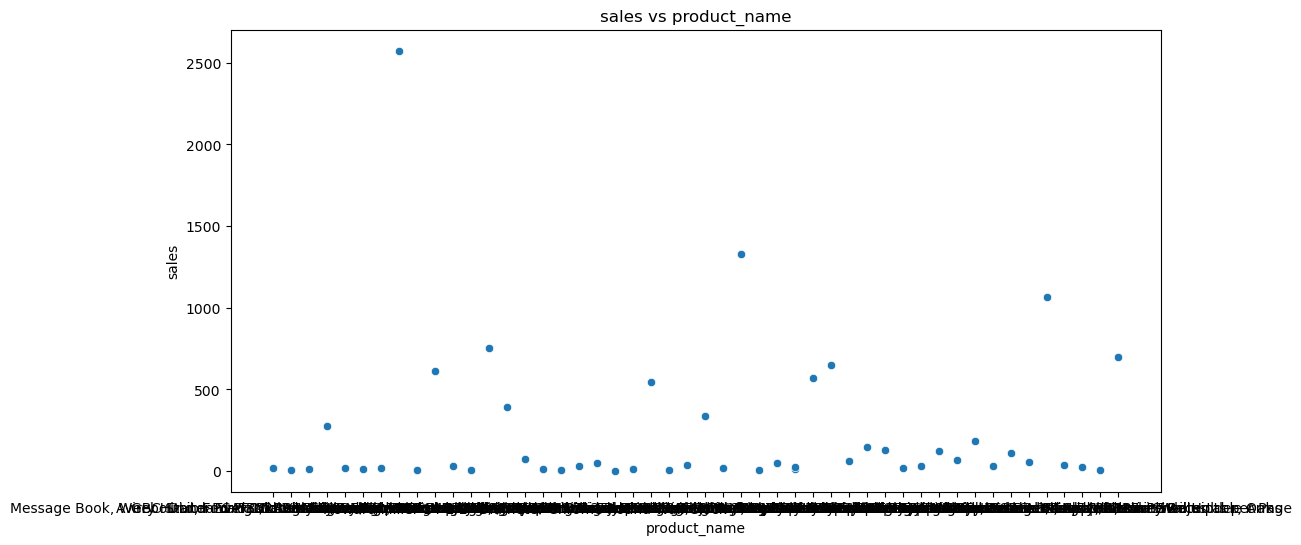

In [5]:
# Scatter plot of sales vs product_name
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='product_name', y='sales')
plt.title('sales vs product_name')
plt.xlabel('product_name')
plt.ylabel('sales')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target
X = df[['product_name', 'quantity', 'sales']]  # independent variables
y = df['profit']  # dependent variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compare predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

      Actual   Predicted
29    5.3392   13.430870
4     4.8840    6.151173
26  238.6530  319.046547
30   34.3548  126.926574
32  -53.2856   11.235317


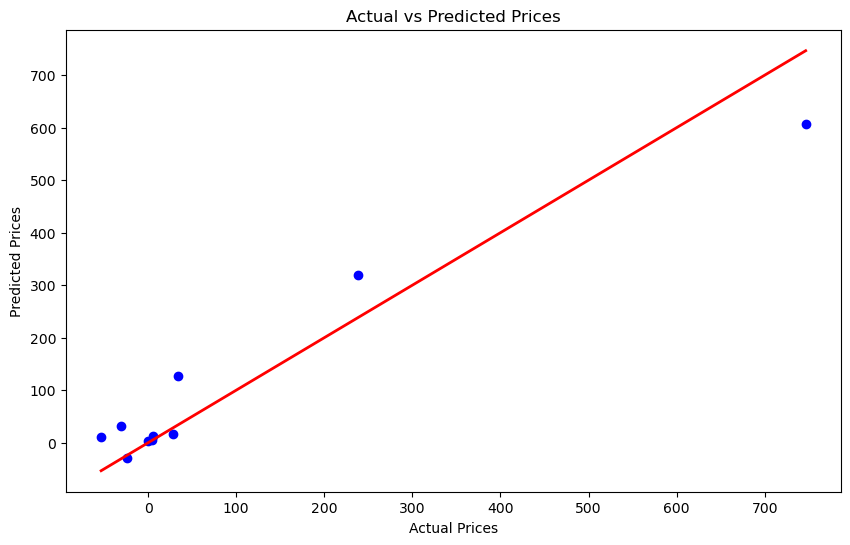

In [10]:
# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()